In [1]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb

In [2]:
%run init-optical_elements.ipynb
%run init-braket_notation.ipynb

# Development

## Setup

<img src = 'setup_realism.jpg' width = '90%'>

### Initial state

In [3]:
cp,cm = symbols('c_+ c_-', real=True)
cp,cm

In [4]:
Ψp = cp*pbk('01')+ cm * pbk('10')
mysim(mbk(Ψp))

In [5]:
ψ0_ABbWZa = comp_sys(Ψp, pbk('0110'))
mysim(mbk(ψ0_ABbWZa))

### PBS

Photon $\mathcal{B}$ go throught the PBS.

The PBS is a controlled mirror, and the mirror is given by

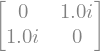

In [6]:
M

In [7]:
ψ1_ABbWZa = ctrlp(M, ψ0_ABbWZa, [4,1], [3])
mysim(mbk(ψ1_ABbWZa))

### HWP

The HWP is a CNOT, where

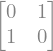

In [8]:
pauli(1)

In [9]:
ψ2_ABbWZa = ctrlp(pauli(1), ψ1_ABbWZa, [3,1],[4])
mysim(mbk(ψ2_ABbWZa))

Changing the subsystems order $ABbWZa \rightarrow AbWZBa$

In [10]:
ψ2_AbWZBa = changeSS(ψ2_ABbWZa, 4,1)
mysim(mbk(ψ2_AbWZBa))

### PAI - photon-atoms interaction

In [11]:
ψ3_AbWZBa = ctrlp(pauli(1), ψ2_AbWZBa, [4,0],[3])
ψ3_AbWZBa = ctrlp(pauli(1), ψ3_AbWZBa, [4,1],[2])
mysim(mbk(ψ3_AbWZBa))

### Mirrors

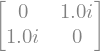

In [12]:
M

In [13]:
ψ4_AbWZBa = gatep(M, ψ3_AbWZBa, 4)
mysim(mbk(ψ4_AbWZBa))

### BS

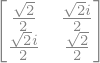

In [14]:
mysim(BS)

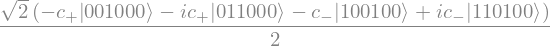

In [15]:
ψ5_AbWZBa = gatep(BS, ψ4_AbWZBa, 4)
mysim(mbk(ψ5_AbWZBa))

## Irreality for $b$ - QWP$_{out}$

In [16]:
mysim(mbk(ψ2_AbWZBa))

In [18]:
ψ2out_AbWZBa = ctrlp(M, ψ2_AbWZBa, [5, 1], [0])
mysim(mbk(ψ2out_AbWZBa))

In [19]:
ρ2out_AbWZ_trBa = ptraceB(16, 4, proj(ψ2out_AbWZBa))
mysim(mbk(ρ2out_AbWZ_trBa))

In [20]:
ρ2out_0bWZ_trBa = projM(8, '0', ρ2out_AbWZ_trBa)
mysim(mbk(ρ2out_0bWZ_trBa))

In [21]:
ρ2out_0bWZ_trBa_deph = dephasing_map_3qubits(ρ2out_0bWZ_trBa)
mysim(mbk(ρ2out_0bWZ_trBa_deph))#.subs(cp**2+cm**2, 1)

In [22]:
Irr_b_out = von_neumann_sympy(ρ2out_0bWZ_trBa_deph) - von_neumann_sympy(ρ2out_0bWZ_trBa)
Irr_b_out

## Irreality for $b$ - QWP$_{in}$

In [23]:
mysim(mbk(ψ2_AbWZBa))

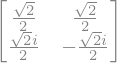

In [24]:
mysim(QWP)

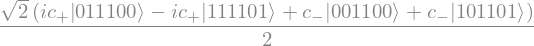

In [40]:
ψ2in_AbWZBa = gatep(QWP, ψ2_AbWZBa, 5)
ψ2in_AbWZBa = ctrlp(M, ψ2in_AbWZBa, [5, 1], [0])
mysim(mbk(ψ2in_AbWZBa))

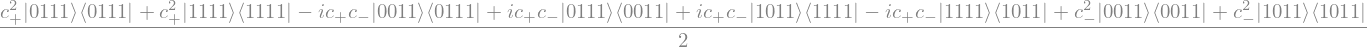

In [41]:
ρ2in_AbWZ_trBa = ptraceB(16, 4, proj(ψ2in_AbWZBa))
mysim(mbk(ρ2in_AbWZ_trBa))

In [42]:
ρ2in_0bWZ_trBa = projM(8, '0', ρ2in_AbWZ_trBa)
mysim(mbk(ρ2in_0bWZ_trBa)).subs(cp**2+cm**2, 1)

In [45]:
ρ2in_0bWZ_trBa_deph = dephasing_map_3qubits(ρ2in_0bWZ_trBa)
mysim(mbk(ρ2in_0bWZ_trBa_deph)).subs(cp**2+cm**2, 1)

In [49]:
Irr_b_in = von_neumann_sympy(ρ2in_0bWZ_trBa_deph) - von_neumann_sympy(ρ2in_0bWZ_trBa)
Irr_b_in.subs(cp**2+cm**2, 1)

In [51]:
von_neumann_sympy(ρ2in_0bWZ_trBa_deph).subs(cp**2+cm**2, 1)

In [48]:
von_neumann_sympy(ρ2in_0bWZ_trBa)

## Irreality for $WZ$ - QWP$_{out}$

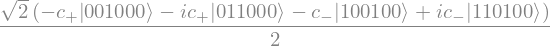

In [84]:
mysim(mbk(ψ5_AbWZBa))

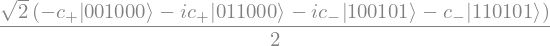

In [85]:
ψ5out_AbWZBa = ctrlp(M, ψ5_AbWZBa, [5, 1], [0])
mysim(mbk(ψ5out_AbWZBa))

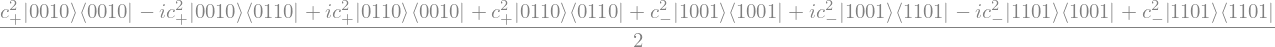

In [86]:
ρ5out_AbWZ_trBa = ptraceB(16, 4, proj(ψ5out_AbWZBa))
mysim(mbk(ρ5out_AbWZ_trBa))

In [96]:
ρ5out_00WZ_trBa = projM(4, '00', ρ5out_AbWZ_trBa)
mysim(mbk(ρ5out_00WZ_trBa))

In [97]:
von_neumann_sympy(ρ5out_00WZ_trBa)

In [98]:
ρ5out_00WZ_trBa_deph = dephasing_map_2qubits(ρ5out_00WZ_trBa)
mysim(mbk(ρ5out_00WZ_trBa_deph))#.subs(cp**5+cm**5, 1)

In [99]:
von_neumann_sympy(ρ5out_00WZ_trBa_deph)

In [100]:
Irr_b_out = von_neumann_sympy(ρ5out_00WZ_trBa_deph) - von_neumann_sympy(ρ5out_00WZ_trBa)
Irr_b_out

## Irreality for $WZ$ - QWP$_{in}$

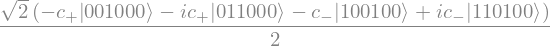

In [101]:
mysim(mbk(ψ5_AbWZBa))

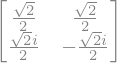

In [102]:
mysim(QWP)

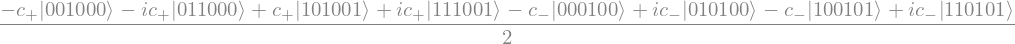

In [103]:
ψ5in_AbWZBa = gatep(QWP, ψ5_AbWZBa, 5)
ψ5in_AbWZBa = ctrlp(M, ψ5in_AbWZBa, [5, 1], [0])
mysim(mbk(ψ5in_AbWZBa))

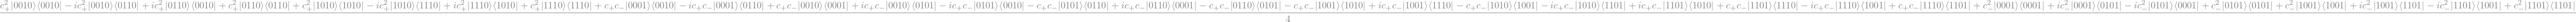

In [104]:
ρ5in_AbWZ_trBa = ptraceB(16, 4, proj(ψ5in_AbWZBa))
mysim(mbk(ρ5in_AbWZ_trBa))

In [106]:
ρ5in_00WZ_trBa = projM(4, '00', ρ5in_AbWZ_trBa)
mysim(mbk(ρ5in_00WZ_trBa)).subs(cp**2+cm**2, 1)

In [114]:
von_neumann_sympy(ρ2in_0bWZ_trBa)

In [110]:
ρ5in_00WZ_trBa_deph = dephasing_map_2qubits(ρ5in_00WZ_trBa)
mysim(mbk(ρ5in_00WZ_trBa_deph)).subs(cp**2+cm**2, 1)

In [113]:
von_neumann_sympy(ρ2in_0bWZ_trBa_deph).subs(cp**2+cm**2, 1)

In [112]:
Irr_b_in = von_neumann_sympy(ρ5in_00WZ_trBa_deph) - von_neumann_sympy(ρ5in_00WZ_trBa)
Irr_b_in.subs(cp**2+cm**2, 1)